In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA

In [2]:
# Load dataset
file_path = "/content/Online Retail.xlsx"
df = pd.read_excel(file_path, engine="openpyxl")


In [3]:

# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])


In [4]:

# Convert CustomerID to integer
df['CustomerID'] = df['CustomerID'].astype(int)


In [5]:
# Aggregate data by CustomerID
customer_data = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Number of purchases
    'Quantity': 'sum',       # Total quantity purchased
    'UnitPrice': 'mean'      # Average unit price
}).reset_index()


In [6]:

# Standardize the data
scaler = StandardScaler()
customer_scaled = scaler.fit_transform(customer_data.iloc[:, 1:])

In [7]:

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
customer_data['DBSCAN_Cluster'] = dbscan.fit_predict(customer_scaled)


In [8]:

# Apply K-Means clustering with optimal K (e.g., K=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
customer_data['KMeans_Cluster'] = kmeans.fit_predict(customer_scaled)

In [9]:

# Visualize clusters using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(customer_scaled)
customer_data['PCA1'] = reduced_data[:, 0]
customer_data['PCA2'] = reduced_data[:, 1]


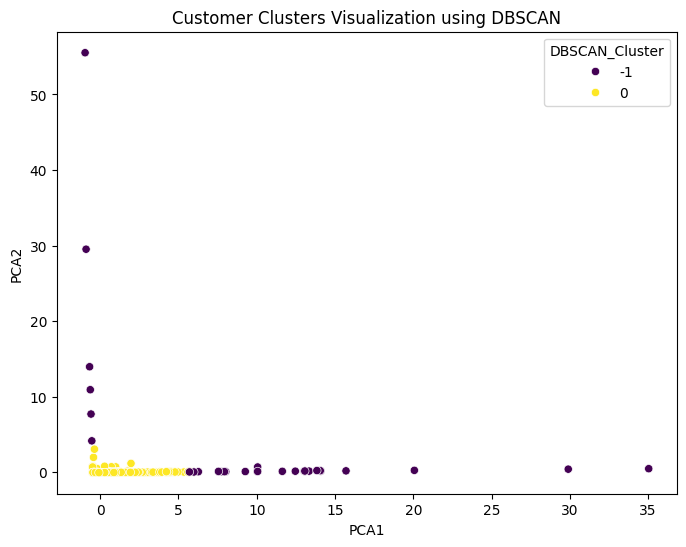

In [10]:

# DBSCAN Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue=customer_data['DBSCAN_Cluster'], palette='viridis', data=customer_data)
plt.title('Customer Clusters Visualization using DBSCAN')
plt.show()


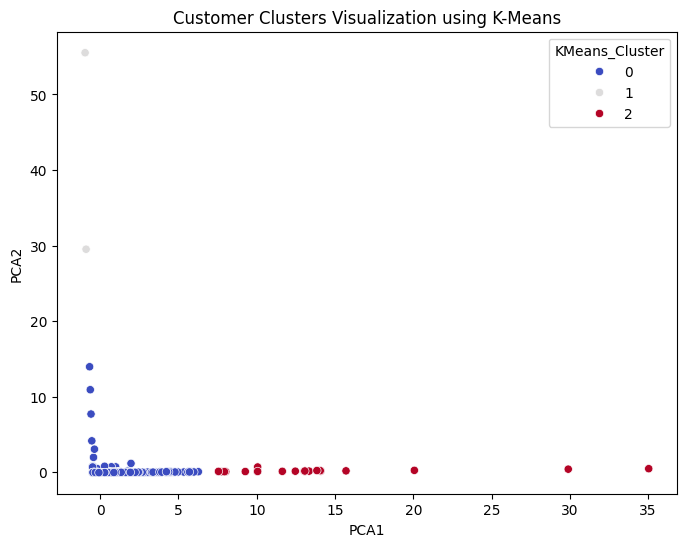

In [11]:

# K-Means Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue=customer_data['KMeans_Cluster'], palette='coolwarm', data=customer_data)
plt.title('Customer Clusters Visualization using K-Means')
plt.show()

In [12]:

# Compare number of clusters detected
dbscan_clusters = len(set(customer_data['DBSCAN_Cluster'])) - (1 if -1 in customer_data['DBSCAN_Cluster'].values else 0)
kmeans_clusters = len(set(customer_data['KMeans_Cluster']))


In [13]:

print(f"DBSCAN detected {dbscan_clusters} clusters (excluding noise).")
print(f"K-Means used {kmeans_clusters} clusters.")

DBSCAN detected 1 clusters (excluding noise).
K-Means used 3 clusters.
